In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import json
from pathlib import Path
import alpaca_trade_api as tradeapi
import requests
import seaborn as sns
import os 
from dotenv import load_dotenv

%matplotlib inline

In [2]:
load_dotenv()

alpaca_api_key = os.getenv("Api_key")
alpaca_secret_key = os.getenv("Secret_key")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')


type(alpaca_api_key)


str

In [3]:
energy_df = api.alpha_vantage.historic_quotes('XLE', adjusted=True, output_format='pandas')

financials_df = api.alpha_vantage.historic_quotes('XLF', adjusted=True, output_format='pandas')

materials_df = api.alpha_vantage.historic_quotes('XLB', adjusted=True, output_format='pandas')

technology_df = api.alpha_vantage.historic_quotes('XLK', adjusted=True, output_format='pandas')

In [4]:
health_df = api.alpha_vantage.historic_quotes('XLV', adjusted=True, output_format='pandas')

industrial_df = api.alpha_vantage.historic_quotes('XLI', adjusted=True, output_format='pandas')

utilities_df = api.alpha_vantage.historic_quotes('XLU', adjusted=True, output_format='pandas')

In [5]:
real_estate_df = api.alpha_vantage.historic_quotes('RWR', adjusted=True, output_format='pandas')


cons_disc_df = api.alpha_vantage.historic_quotes('XLY', adjusted=True, output_format='pandas')



In [6]:

cons_staples_df = api.alpha_vantage.historic_quotes('XLP', adjusted=True, output_format='pandas')

transports_df = api.alpha_vantage.historic_quotes('IYT', adjusted=True, output_format='pandas')

# ive_df = api.alpha_vantage.historic_quotes('IVE', adjusted=True, output_format='pandas')
spy_df = api.alpha_vantage.historic_quotes('SPY', adjusted=True, output_format='pandas')


In [7]:
#DATA CLEANUP

#Select the one column we need,  "adjusted close", and drop the others

materials_df = materials_df['5. adjusted close']
materials_df.head()

technology_df = technology_df['5. adjusted close']
technology_df.head()

real_estate_df = real_estate_df['5. adjusted close']
real_estate_df.head()

cons_disc_df = cons_disc_df['5. adjusted close']
cons_disc_df.head()

cons_staples_df = cons_staples_df['5. adjusted close']
cons_staples_df.head()

energy_df = energy_df['5. adjusted close']
energy_df.head()

financials_df = financials_df['5. adjusted close']
financials_df.head()

health_df = health_df['5. adjusted close']
health_df.head()

industrial_df = industrial_df['5. adjusted close']
industrial_df.head()

utilities_df = utilities_df['5. adjusted close']
utilities_df.head()

transports_df = transports_df['5. adjusted close']
transports_df.head()

spy_df = spy_df['5. adjusted close']
spy_df.head()


#Use concat to put the data in one dataframe
concat_df = pd.concat([materials_df, technology_df, real_estate_df, cons_disc_df, 
                       cons_staples_df, energy_df, financials_df, health_df, industrial_df, 
                       utilities_df, transports_df, spy_df], 
                      axis = "columns", join = "inner")
concat_df.head()


,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close
date,,,,,,,,,,,,
2020-05-01,50.79,88.90,75.11,112.24,57.62,35.85,22.06,97.83,62.27,55.88,144.775,282.79
2020-04-30,51.88,91.41,77.87,116.60,58.26,38.00,22.79,99.73,64.21,57.26,149.920,290.48
2020-04-29,53.47,91.82,79.10,117.33,58.96,38.86,23.38,100.19,65.51,58.61,154.400,293.21
2020-04-28,52.14,88.20,77.38,114.80,59.21,36.18,22.72,99.53,64.28,59.15,150.270,285.73
2020-04-27,51.19,89.39,76.08,114.35,58.88,35.37,22.48,101.58,63.10,58.93,148.900,287.05


In [8]:
#Change column names to avoid confusion
columns = ['Materials close',
          'Tech close',
          'RE close',
          'Discretionary close',
          'Staples close',
          'Energy close',
          'Fin close',
          'HealthCare close',
          'Industrials close',
          'Utilities close',
          'Transports close',
          'S&P 500 Close']
concat_df.columns = columns
concat_df.head()

,Materials close,Tech close,RE close,Discretionary close,Staples close,Energy close,Fin close,HealthCare close,Industrials close,Utilities close,Transports close,S&P 500 Close
date,,,,,,,,,,,,
2020-05-01,50.79,88.90,75.11,112.24,57.62,35.85,22.06,97.83,62.27,55.88,144.775,282.79
2020-04-30,51.88,91.41,77.87,116.60,58.26,38.00,22.79,99.73,64.21,57.26,149.920,290.48
2020-04-29,53.47,91.82,79.10,117.33,58.96,38.86,23.38,100.19,65.51,58.61,154.400,293.21
2020-04-28,52.14,88.20,77.38,114.80,59.21,36.18,22.72,99.53,64.28,59.15,150.270,285.73
2020-04-27,51.19,89.39,76.08,114.35,58.88,35.37,22.48,101.58,63.10,58.93,148.900,287.05


In [9]:
#Sort earliest to latest so that .pct_change() function works right.

concat_df.sort_index(inplace=True, ascending=True)
concat_df.head()

,Materials close,Tech close,RE close,Discretionary close,Staples close,Energy close,Fin close,HealthCare close,Industrials close,Utilities close,Transports close,S&P 500 Close
date,,,,,,,,,,,,
2003-10-10,15.6663,15.2225,24.9652,23.4176,13.9255,16.9139,15.2858,21.2388,17.2546,12.1628,42.1221,75.1311
2003-10-13,15.8310,15.2692,25.0908,23.6569,13.9785,16.9818,15.5271,21.2993,17.3261,12.2403,42.7774,75.3682
2003-10-14,15.9340,15.2303,25.1083,23.7845,14.0515,16.9139,15.6190,21.3296,17.4118,12.2735,43.0097,75.6341
2003-10-15,15.9203,15.3238,25.0088,23.6888,14.0316,16.6694,15.5788,21.2842,17.4404,12.1186,42.6696,75.4329
2003-10-16,15.9752,15.3783,25.1222,23.7925,14.0515,16.8460,15.5960,21.3977,17.4476,12.1739,42.8023,75.7346


In [10]:
returns_df = concat_df.pct_change()
returns_df

,Materials close,Tech close,RE close,Discretionary close,Staples close,Energy close,Fin close,HealthCare close,Industrials close,Utilities close,Transports close,S&P 500 Close
date,,,,,,,,,,,,
2003-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-10-13,0.010513,0.003068,0.005031,0.010219,0.003806,0.004014,0.015786,0.002849,0.004144,0.006372,0.015557,0.003156
2003-10-14,0.006506,-0.002548,0.000697,0.005394,0.005222,-0.003998,0.005919,0.001423,0.004946,0.002712,0.005430,0.003528
2003-10-15,-0.000860,0.006139,-0.003963,-0.004024,-0.001416,-0.014456,-0.002574,-0.002128,0.001643,-0.012621,-0.007908,-0.002660
2003-10-16,0.003448,0.003557,0.004534,0.004378,0.001418,0.010594,0.001104,0.005333,0.000413,0.004563,0.003110,0.004000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-27,0.026675,0.008575,0.038635,0.018708,0.002896,0.021664,0.034039,0.012863,0.024850,0.010460,0.028528,0.014418
2020-04-28,0.018558,-0.013312,0.017087,0.003935,0.005605,0.022901,0.010676,-0.020181,0.018700,0.003733,0.009201,-0.004599
2020-04-29,0.025508,0.041043,0.022228,0.022038,-0.004222,0.074074,0.029049,0.006631,0.019135,-0.009129,0.027484,0.026179


In [11]:
# Drop nulls
returns_df.dropna(inplace=True)

#count nulls again
returns_df.isnull().sum()

Materials close        0
Tech close             0
RE close               0
Discretionary close    0
Staples close          0
Energy close           0
Fin close              0
HealthCare close       0
Industrials close      0
Utilities close        0
Transports close       0
S&P 500 Close          0
dtype: int64

In [12]:
# Checking for duplicate rows
returns_df.duplicated()

date
2003-10-13    False
2003-10-14    False
2003-10-15    False
2003-10-16    False
2003-10-17    False
              ...  
2020-04-27    False
2020-04-28    False
2020-04-29    False
2020-04-30    False
2020-05-01    False
Length: 4167, dtype: bool

In [13]:
# drop duplicates
returns_df.drop_duplicates(inplace=True)
returns_df.head()

,Materials close,Tech close,RE close,Discretionary close,Staples close,Energy close,Fin close,HealthCare close,Industrials close,Utilities close,Transports close,S&P 500 Close
date,,,,,,,,,,,,
2003-10-13,0.010513,0.003068,0.005031,0.010219,0.003806,0.004014,0.015786,0.002849,0.004144,0.006372,0.015557,0.003156
2003-10-14,0.006506,-0.002548,0.000697,0.005394,0.005222,-0.003998,0.005919,0.001423,0.004946,0.002712,0.005430,0.003528
2003-10-15,-0.000860,0.006139,-0.003963,-0.004024,-0.001416,-0.014456,-0.002574,-0.002128,0.001643,-0.012621,-0.007908,-0.002660
2003-10-16,0.003448,0.003557,0.004534,0.004378,0.001418,0.010594,0.001104,0.005333,0.000413,0.004563,0.003110,0.004000
2003-10-17,-0.009452,-0.016211,-0.007846,-0.014080,-0.006135,-0.006856,-0.008836,-0.011319,-0.006964,-0.006366,-0.004458,-0.010909


In [14]:
# rename columns to create dataframe for daily returns
returns_df.rename(columns={'Materials close': 'Materials return',
                          'Tech close': 'Tech return',
                          'RE close': 'RE return',
                          'Discretionary close': 'Discretionary return',
                          'Staples close': 'Staples return',
                          'Energy close': 'Energy return',
                          'Fin close': 'Fin return',
                          'HealthCare close': 'HealthCare return',
                          'Industrials close': 'Industrials return',
                          'Utilities close': 'Utilities return',
                          'Transports close': 'Transports return',
                          'S&P 500 Close': 'S&P 500 return'},
                  inplace=True)
returns_df.head()

,Materials return,Tech return,RE return,Discretionary return,Staples return,Energy return,Fin return,HealthCare return,Industrials return,Utilities return,Transports return,S&P 500 return
date,,,,,,,,,,,,
2003-10-13,0.010513,0.003068,0.005031,0.010219,0.003806,0.004014,0.015786,0.002849,0.004144,0.006372,0.015557,0.003156
2003-10-14,0.006506,-0.002548,0.000697,0.005394,0.005222,-0.003998,0.005919,0.001423,0.004946,0.002712,0.005430,0.003528
2003-10-15,-0.000860,0.006139,-0.003963,-0.004024,-0.001416,-0.014456,-0.002574,-0.002128,0.001643,-0.012621,-0.007908,-0.002660
2003-10-16,0.003448,0.003557,0.004534,0.004378,0.001418,0.010594,0.001104,0.005333,0.000413,0.004563,0.003110,0.004000
2003-10-17,-0.009452,-0.016211,-0.007846,-0.014080,-0.006135,-0.006856,-0.008836,-0.011319,-0.006964,-0.006366,-0.004458,-0.010909


In [15]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns_materials = (1 + returns_df['Materials return']).cumprod()
cumulative_returns_tech = (1 + returns_df['Tech return']).cumprod()
cumulative_returns_RE = (1 + returns_df['RE return']).cumprod()
cumulative_returns_Discretionary = (1 + returns_df['Discretionary return']).cumprod()
cumulative_returns_Staples = (1 + returns_df['Staples return']).cumprod()
cumulative_returns_Energy = (1 + returns_df['Energy return']).cumprod()
cumulative_returns_Fin = (1 + returns_df['Fin return']).cumprod()
cumulative_returns_HealthCare = (1 + returns_df['HealthCare return']).cumprod()
cumulative_returns_Industrials = (1 + returns_df['Industrials return']).cumprod()
cumulative_returns_Utilities = (1 + returns_df['Utilities return']).cumprod()
cumulative_returns_Transports = (1 + returns_df['Transports return']).cumprod()

In [16]:
cumulative_returns_materials

date
2003-10-13    1.010513
2003-10-14    1.017088
2003-10-15    1.016213
2003-10-16    1.019717
2003-10-17    1.010079
                ...   
2020-04-27    3.267523
2020-04-28    3.328163
2020-04-29    3.413059
2020-04-30    3.311567
2020-05-01    3.241991
Name: Materials return, Length: 4167, dtype: float64

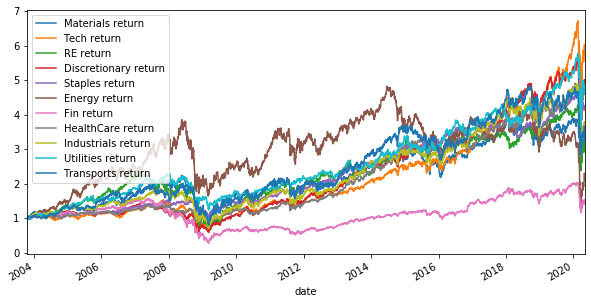

In [17]:
#plot cumulative returns

cumulative_returns_materials.plot(figsize=(10,5), legend=True)
cumulative_returns_tech.plot(figsize=(10,5), legend=True)
cumulative_returns_RE.plot(figsize=(10,5), legend=True)
cumulative_returns_Discretionary.plot(figsize=(10,5), legend=True)
cumulative_returns_Staples.plot(figsize=(10,5), legend=True)
cumulative_returns_Energy.plot(figsize=(10,5), legend=True)
cumulative_returns_Fin.plot(figsize=(10,5), legend=True)
cumulative_returns_HealthCare.plot(figsize=(10,5), legend=True)
cumulative_returns_Industrials.plot(figsize=(10,5), legend=True)
cumulative_returns_Utilities.plot(figsize=(10,5), legend=True)
cumulative_returns_Transports.plot(figsize=(10,5), legend=True)

In [18]:
# Calculate Standard Deviations for each sector
health_std = returns_df['HealthCare return'].std()
print(f' Healthcare standard deviation is {health_std}')

industrials_std = returns_df['Industrials return'].std()
print(f' Industrials standard deviation is {industrials_std}')

utilities_std = returns_df['Utilities return'].std()
print(f' Utilities standard deviation is {utilities_std}')

materials_std = returns_df['Materials return'].std()
print(f' Materials standard deviation is {materials_std}')

tech_std = returns_df['Tech return'].std()
print(f' Technology standard deviation is {tech_std}')

real_estate_std = returns_df['RE return'].std()
print(f' Real estate standard deviation is {real_estate_std}')

cons_disc_std = returns_df['Discretionary return'].std()
print(f' Consumer Discretionary standard deviation is {cons_disc_std}')

staples_std = returns_df['Staples return'].std()
print(f' Staples standard deviation is {staples_std}')

energy_std = returns_df['Energy return'].std()
print(f' Energy standard deviation is {energy_std}')

financials_std = returns_df['Fin return'].std()
print(f' Financials standard deviation is {financials_std}')

transports_std = returns_df['Transports return'].std()
print(f' Transports standard deviation is {transports_std}')









# SP500_std = returns_df['SP500_return'].std()
# print(f' S&P 500 standard deviation is {SP500_std}')

# Identify the sector with highest standard deviation (riskiest)
sectors = [health_std, industrials_std, utilities_std, materials_std, tech_std,
           real_estate_std, cons_disc_std, staples_std, energy_std, financials_std, transports_std ]
sectors.sort()
print(sectors)

 Healthcare standard deviation is 0.010990536854688808
 Industrials standard deviation is 0.013337363855978265
 Utilities standard deviation is 0.011814651629996162
 Materials standard deviation is 0.014985524229934601
 Technology standard deviation is 0.013325845448843401
 Real estate standard deviation is 0.019783194308093773
 Consumer Discretionary standard deviation is 0.013239538765127708
 Staples standard deviation is 0.009071747186554168
 Energy standard deviation is 0.018457212148046038
 Financials standard deviation is 0.019255131918076252
 Transports standard deviation is 0.01522068566054936
[0.009071747186554168, 0.010990536854688808, 0.011814651629996162, 0.013239538765127708, 0.013325845448843401, 0.013337363855978265, 0.014985524229934601, 0.01522068566054936, 0.018457212148046038, 0.019255131918076252, 0.019783194308093773]


In [19]:
# Calculate the annualized standard deviation (252 trading days) for each sector
annual_HealthCare_std = health_std * np.sqrt(252)
annual_HealthCare_std

annual_Industrials_std = industrials_std * np.sqrt(252)
annual_Industrials_std

annual_Utilities_std = utilities_std * np.sqrt(252)
annual_Utilities_std

annual_Materials_std = materials_std * np.sqrt(252)
annual_Materials_std

annual_Tech_std = tech_std * np.sqrt(252)
annual_Tech_std

annual_RE_std = real_estate_std * np.sqrt(252)
annual_RE_std

annual_Discretionary_std = cons_disc_std * np.sqrt(252)
annual_Discretionary_std

annual_Staples_std = staples_std * np.sqrt(252)
annual_Staples_std

annual_Energy_std = energy_std * np.sqrt(252)
annual_Energy_std

annual_FIN_std = financials_std * np.sqrt(252)
annual_FIN_std

annual_Transports_std = transports_std * np.sqrt(252)
annual_Transports_std

# annual_SP500_std = SP500_std * np.sqrt(252)
# annual_HealthCare_std

0.2416208942502029

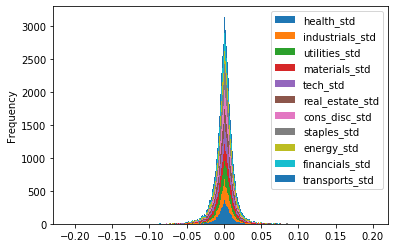

In [20]:
#Plot

sectors_std = pd.DataFrame({
    "health_std": returns_df['HealthCare return'],
    "industrials_std": returns_df['Industrials return'],
    "utilities_std": returns_df['Utilities return'],
    "materials_std": returns_df['Materials return'],
    "tech_std": returns_df['Tech return'],
    "real_estate_std": returns_df['RE return'],
    "cons_disc_std": returns_df['Discretionary return'],
    "staples_std": returns_df['Staples return'],
    "energy_std": returns_df['Energy return'],
    "financials_std": returns_df['Fin return'],
    "transports_std": returns_df['Transports return'],
})

sectors_std.plot.hist(stacked=True, bins=300)

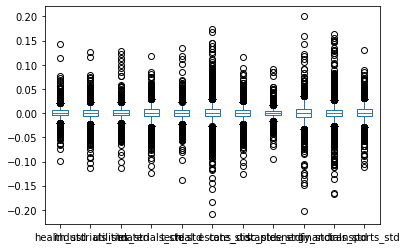

In [21]:
sectors_std.plot.box()

In [22]:

# Calculate Sharpe Ratios for the sectors

HealthCare_sharpe = (returns_df['HealthCare return'].mean() * 252) / (returns_df['HealthCare return'].std() * np.sqrt(252))

Industrials_sharpe = (returns_df['Industrials return'].mean() * 252) / (returns_df['Industrials return'].std() * np.sqrt(252))

Utilities_sharpe = (returns_df['Utilities return'].mean() * 252) / (returns_df['Utilities return'].std() * np.sqrt(252))

Materials_sharpe = (returns_df['Materials return'].mean() * 252) / (returns_df['Materials return'].std() * np.sqrt(252))

Tech_sharpe = (returns_df['Tech return'].mean() * 252) / (returns_df['Tech return'].std() * np.sqrt(252))

RE_sharpe = (returns_df['RE return'].mean() * 252) / (returns_df['RE return'].std() * np.sqrt(252))

Discretionary_sharpe = (returns_df['Discretionary return'].mean() * 252) / (returns_df['Discretionary return'].std() * np.sqrt(252))

Staples_sharpe = (returns_df['Staples return'].mean() * 252) / (returns_df['Staples return'].std() * np.sqrt(252))

Energy_sharpe = (returns_df['Energy return'].mean() * 252) / (returns_df['Energy return'].std() * np.sqrt(252))

Financials_sharpe = (returns_df['Fin return'].mean() * 252) / (returns_df['Fin return'].std() * np.sqrt(252))

Transports_sharpe = (returns_df['Transports return'].mean() * 252) / (returns_df['Transports return'].std() * np.sqrt(252))

print(f" HealthCare: {HealthCare_sharpe},Industrials: {Industrials_sharpe},Utilities:{Utilities_sharpe},Materials: {Materials_sharpe},Technology: {Tech_sharpe},Real Estate: {RE_sharpe},Consumer Discretionary: {Discretionary_sharpe},Consumer Staples: {Staples_sharpe},Energy: {Energy_sharpe},Financials: {Financials_sharpe},Transports: {Transports_sharpe}")

 HealthCare: 0.6165140088775338,Industrials: 0.4727900273760369,Utilities:0.5852809487113092,Materials: 0.4185740854610443,Technology: 0.6103701956375294,Real Estate: 0.3698789877808839,Consumer Discretionary: 0.5564261985437952,Consumer Staples: 0.6684488337743945,Energy: 0.30253731398949213,Financials: 0.22520511001132418,Transports: 0.43017610112073096


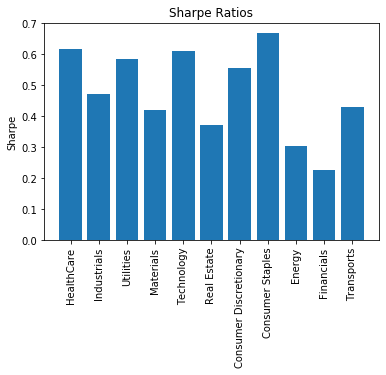

In [23]:
#Plot the sharpe ratios

objects = ('HealthCare',
           'Industrials',
           'Utilities',
           'Materials',
           'Technology',
           'Real Estate',
           'Consumer Discretionary',
           'Consumer Staples',
          'Energy',
          'Financials',
          'Transports')
y_pos = np.arange(len(objects))
sharpe = [HealthCare_sharpe,
          Industrials_sharpe,
          Utilities_sharpe,
          Materials_sharpe,
         Tech_sharpe,
         RE_sharpe,
         Discretionary_sharpe,
         Staples_sharpe,
         Energy_sharpe,
         Financials_sharpe,
         Transports_sharpe]

plt.bar(y_pos, sharpe, align='center')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Sharpe')
plt.title('Sharpe Ratios')

plt.show()

In [24]:
# Drop nulls on Returns
returns_df.dropna(inplace=True)

#count nulls 
returns_df.isnull().sum()

Materials return        0
Tech return             0
RE return               0
Discretionary return    0
Staples return          0
Energy return           0
Fin return              0
HealthCare return       0
Industrials return      0
Utilities return        0
Transports return       0
S&P 500 return          0
dtype: int64

In [25]:
#Check correlation

sector_correlation = returns_df.corr()
sector_correlation

,Materials return,Tech return,RE return,Discretionary return,Staples return,Energy return,Fin return,HealthCare return,Industrials return,Utilities return,Transports return,S&P 500 return
Materials return,1.000000,0.761640,0.651843,0.786922,0.642656,0.774966,0.731352,0.667321,0.856311,0.574562,0.793243,0.853319
Tech return,0.761640,1.000000,0.633527,0.842002,0.719271,0.661647,0.730081,0.746081,0.833109,0.594847,0.756555,0.911838
RE return,0.651843,0.633527,1.000000,0.737316,0.598340,0.535559,0.794066,0.554304,0.709150,0.573430,0.672311,0.743505
Discretionary return,0.786922,0.842002,0.737316,1.000000,0.729726,0.652030,0.801526,0.731633,0.870237,0.580467,0.830715,0.902984
Staples return,0.642656,0.719271,0.598340,0.729726,1.000000,0.548903,0.627079,0.746410,0.725204,0.710530,0.650446,0.796936
Energy return,0.774966,0.661647,0.535559,0.652030,0.548903,1.000000,0.623422,0.598086,0.730474,0.579587,0.642275,0.791807
Fin return,0.731352,0.730081,0.794066,0.801526,0.627079,0.623422,1.000000,0.651621,0.807835,0.524662,0.758010,0.860674
HealthCare return,0.667321,0.746081,0.554304,0.731633,0.746410,0.598086,0.651621,1.000000,0.745997,0.619377,0.662768,0.833273
Industrials return,0.856311,0.833109,0.709150,0.870237,0.725204,0.730474,0.807835,0.745997,1.000000,0.609047,0.890903,0.918249
Utilities return,0.574562,0.594847,0.573430,0.580467,0.710530,0.579587,0.524662,0.619377,0.609047,1.000000,0.529738,0.695279


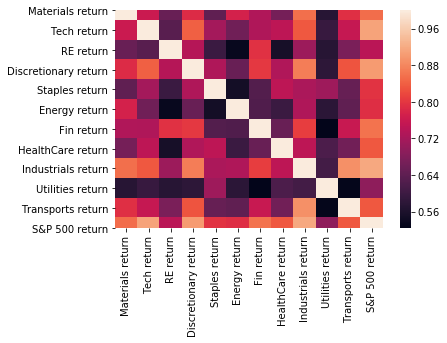

In [26]:
# Heapmap to visualize sector correlation
sns.heatmap(sector_correlation)

In [27]:
#BETA CALCULATION Materials Sector and S&P 500

# Calculate covariance of Materials vs. S&P 500
materials_covariance = returns_df['Materials return'].cov(returns_df['S&P 500 return'])
materials_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P 500 return'].var()
variance

# Calculate beta of Materials Sector
Materials_beta = materials_covariance / variance
Materials_beta

1.061332614618054

In [28]:
#BETA CALCULATION Technology Sector and S&P 500

# Calculate covariance of Tech vs. S&P 500
tech_covariance = returns_df['Tech return'].cov(returns_df['S&P 500 return'])
tech_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P 500 return'].var()
variance

# Calculate beta of Technology Sector
Tech_beta = tech_covariance / variance
Tech_beta

1.0085105577848397

In [29]:
#BETA CALCULATION Real Estate Sector and S&P 500

# Calculate covariance of RE vs. S&P 500
RE_covariance = returns_df['RE return'].cov(returns_df['S&P 500 return'])
RE_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P 500 return'].var()
variance

# Calculate beta of Real Estate Sector
RE_beta = materials_covariance / variance
RE_beta

1.061332614618054

In [30]:
#BETA CALCULATION Consumer Discretionary Sector and S&P 500

# Calculate covariance of Consumer Discretionary vs. S&P 500
Discretionary_covariance = returns_df['Discretionary return'].cov(returns_df['S&P 500 return'])
Discretionary_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P 500 return'].var()
variance

# Calculate beta of Consumer Discretionary Sector
Discretionary_beta = Discretionary_covariance / variance
Discretionary_beta

0.9922489242741143

In [31]:
#BETA CALCULATION Consumer Staples Sector and S&P 500

# Calculate covariance of Healthcare vs. S&P 500
Staples_covariance = returns_df['Staples return'].cov(returns_df['S&P 500 return'])
Discretionary_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P 500 return'].var()
variance

# Calculate beta of Consumer Staples Sector
Staples_beta = Staples_covariance / variance
Staples_beta

0.6000430053758643

In [32]:
#BETA CALCULATION Energy Sector and S&P 500

# Calculate covariance of Energy vs. S&P 500
Energy_covariance = returns_df['Energy return'].cov(returns_df['S&P 500 return'])
Energy_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P 500 return'].var()
variance

# Calculate beta of Energy Sector
Energy_beta = Energy_covariance / variance
Energy_beta

1.212979872036041

In [33]:
#BETA CALCULATION Financials Sector and S&P 500

# Calculate covariance of Healthcare vs. S&P 500
Financials_covariance = returns_df['Fin return'].cov(returns_df['S&P 500 return'])
Financials_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P 500 return'].var()
variance

# Calculate beta of Healthcare Sector
Financials_beta = Financials_covariance / variance
Financials_beta

1.3754757802945523

In [34]:
#BETA CALCULATION Consumer HealthCare Sector and S&P 500

# Calculate covariance of Healthcare vs. S&P 500
HealthCare_covariance = returns_df['HealthCare return'].cov(returns_df['S&P 500 return'])
HealthCare_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P 500 return'].var()
variance

# Calculate beta of Healthcare Sector
HealthCare_beta = HealthCare_covariance / variance
HealthCare_beta

0.7601059191306926

In [35]:
#BETA CALCULATION Industrials Sector and S&P 500

# Calculate covariance of Industrials vs. S&P 500
Industrials_covariance = returns_df['Industrials return'].cov(returns_df['S&P 500 return'])
Industrials_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P 500 return'].var()
variance

# Calculate beta of Industrials Sector
Industrials_beta = Industrials_covariance / variance
Industrials_beta

1.016479499723216

In [36]:
#BETA CALCULATION Utilities Sector and S&P 500

# Calculate covariance of Utilities vs. S&P 500
Utilities_covariance = returns_df['Utilities return'].cov(returns_df['S&P 500 return'])
Utilities_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P 500 return'].var()
variance

# Calculate beta of Utilities Sector
Utilities_beta = Utilities_covariance / variance
Utilities_beta

0.6817858526035526

In [37]:
#BETA CALCULATION Transports Sector and S&P 500

# Calculate covariance of Transports vs. S&P 500
Transports_covariance = returns_df['Transports return'].cov(returns_df['S&P 500 return'])
Transports_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P 500 return'].var()
variance

# Calculate beta of Transports Sector
Transports_beta = Transports_covariance / variance
Transports_beta

1.054374733784144

A 10,000 investment in the Materials Sector would have increased to 32419.90769996753


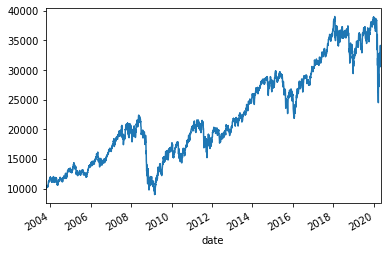

In [38]:
# Plot the monetary returns of Materials Sector 
initial_investment = 10000
cumulative_profit_materials = initial_investment * cumulative_returns_materials
print(f'A 10,000 investment in the Materials Sector would have increased to {cumulative_profit_materials[-1]}')
cumulative_profit_materials.plot()

A 10,000 investment in the Technology Sector would have increased to 58400.39415339094


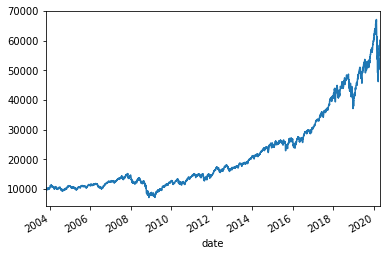

In [39]:
# Plot the monetary returns of Tech Sector 
initial_investment = 10000
cumulative_profit_tech = initial_investment * cumulative_returns_tech
print(f'A 10,000 investment in the Technology Sector would have increased to {cumulative_profit_tech[-1]}')
cumulative_profit_tech.plot()

A 10,000 investment in the Real Estate Sector would have increased to 30085.879544325584


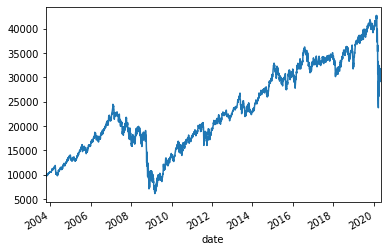

In [40]:
# Plot the monetary returns of Real Estate Sector 
initial_investment = 10000
cumulative_profit_RE = initial_investment * cumulative_returns_RE
print(f'A 10,000 investment in the Real Estate Sector would have increased to {cumulative_profit_RE[-1]}')
cumulative_profit_RE.plot()

A 10,000 investment in the Consumer Discretionary Sector would have increased to 47929.76223011727


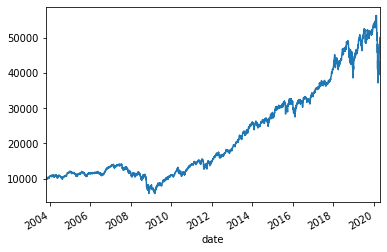

In [41]:
# Plot the monetary returns of Consumer Discretionary Sector 
initial_investment = 10000
cumulative_profit_Discretionary = initial_investment * cumulative_returns_Discretionary
print(f'A 10,000 investment in the Consumer Discretionary Sector would have increased to {cumulative_profit_Discretionary[-1]}')
cumulative_profit_Discretionary.plot()

A 10,000 investment in the Consumer Staples Sector would have increased to 41377.32935980735


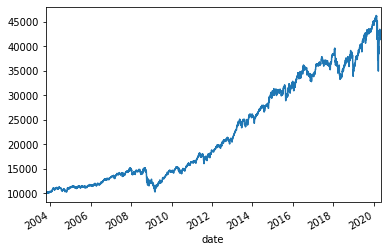

In [42]:
# Plot the monetary returns of Consumer Staples Sector 
initial_investment = 10000
cumulative_profit_Staples = initial_investment * cumulative_returns_Staples
print(f'A 10,000 investment in the Consumer Staples Sector would have increased to {cumulative_profit_Staples[-1]}')
cumulative_profit_Staples.plot()

A 10,000 investment in the Energy Sector would have increased to 21195.58469661045


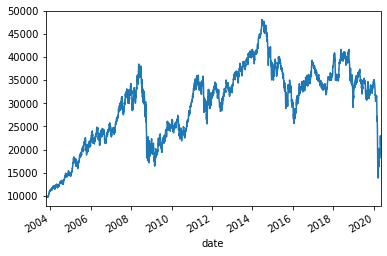

In [43]:
# Plot the monetary returns of Energy Sector 
initial_investment = 10000
cumulative_profit_Energy = initial_investment * cumulative_returns_Energy
print(f'A 10,000 investment in the Energy Sector would have increased to {cumulative_profit_Energy[-1]}')
cumulative_profit_Energy.plot()

A 10,000 investment in the Financials Sector would have increased to 14431.694775543247


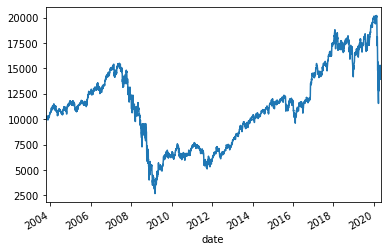

In [44]:
# Plot the monetary returns of Financial Sector 
initial_investment = 10000
cumulative_profit_Fin = initial_investment * cumulative_returns_Fin
print(f'A 10,000 investment in the Financials Sector would have increased to {cumulative_profit_Fin[-1]}')
cumulative_profit_Fin.plot()

A 10,000 investment in the Healthcare Sector would have increased to 46061.92440250844


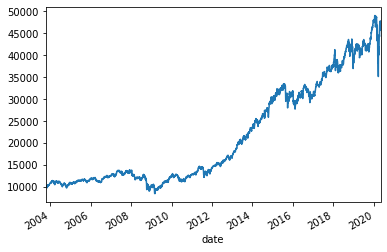

In [45]:
# Plot the monetary returns of HealthCare Sector 
initial_investment = 10000
cumulative_profit_health = initial_investment * cumulative_returns_HealthCare
print(f'A 10,000 investment in the Healthcare Sector would have increased to {cumulative_profit_health[-1]}')
cumulative_profit_health.plot()

A 10,000 investment in the Industrial Sector would have grown to 36088.92701076814


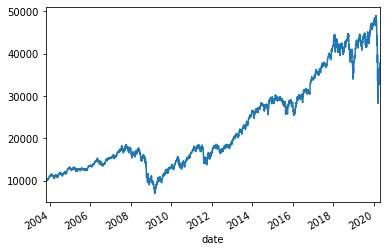

In [46]:
# Plot the monetary returns of Industrial Sector 
initial_investment = 10000
cumulative_profit_industrial = initial_investment * cumulative_returns_Industrials
print(f'A 10,000 investment in the Industrial Sector would have grown to {cumulative_profit_industrial[-1]}')
cumulative_profit_industrial.plot()

A 10,000 investment in the Utilities Sector would have grown to 45943.36830335114


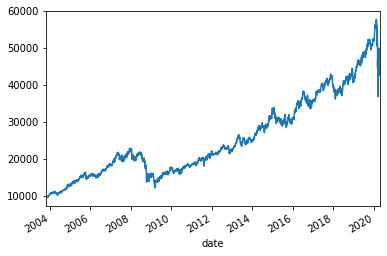

In [47]:
# Plot the monetary returns of Utilities Sector 
initial_investment = 10000
cumulative_profit_utilities = initial_investment * cumulative_returns_Utilities
print(f'A 10,000 investment in the Utilities Sector would have grown to {cumulative_profit_utilities[-1]}')
cumulative_profit_utilities.plot()

A 10,000 investment in the Transports Sector would have grown to 34370.31866882226


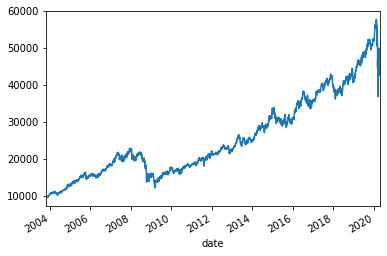

In [48]:
# Plot the monetary returns of Transport Sector 
initial_investment = 10000
cumulative_profit_transports = initial_investment * cumulative_returns_Transports
print(f'A 10,000 investment in the Transports Sector would have grown to {cumulative_profit_transports[-1]}')
cumulative_profit_utilities.plot()

In [49]:
# Calculate the mean of daily returns for HealthCare
avg_daily_return_HealthCare = returns_df.mean()['HealthCare return']
print(f"The average daily return of the HealthCare sector is {avg_daily_return_HealthCare}")


# Calculate the mean of daily returns for Industrials
avg_daily_return_Industrials = returns_df.mean()['Industrials return']
print(f"The average daily return of the Industrials sector is {avg_daily_return_Industrials}")

# Calculate the mean of daily returns for Utilities
avg_daily_return_Utilities = returns_df.mean()['Utilities return']
print(f"The average daily return of the Utilities sector is {avg_daily_return_Utilities}")

# Calculate the mean of daily returns for Materials
avg_daily_return_Materials = returns_df.mean()['Materials return']
print(f"The average daily return of the Materials sector is {avg_daily_return_Materials}")

# Calculate the mean of daily returns for Tech
avg_daily_return_Tech = returns_df.mean()['Tech return']
print(f"The average daily return of the Technology sector is {avg_daily_return_Tech}")

# Calculate the mean of daily returns for Real Estate
avg_daily_return_RE = returns_df.mean()['RE return']
print(f"The average daily return of the Real Estate sector is {avg_daily_return_RE}")

# Calculate the mean of daily returns for Consumer Discretionary
avg_daily_return_Discretionary = returns_df.mean()['Discretionary return']
print(f"The average daily return of the Consumer Discretionary sector is {avg_daily_return_Discretionary}")

# Calculate the mean of daily returns for Consumer Staples
avg_daily_return_Staples = returns_df.mean()['Staples return']
print(f"The average daily return of the Consumer Staples sector is {avg_daily_return_Staples}")

# Calculate the mean of daily returns for Energy
avg_daily_return_Energy = returns_df.mean()['Energy return']
print(f"The average daily return of the Energy sector is {avg_daily_return_Energy}")

# Calculate the mean of daily returns for Financials
avg_daily_return_FIN = returns_df.mean()['Fin return']
print(f"The average daily return of the Financial sector is {avg_daily_return_FIN}")

# Calculate the mean of daily returns for Transports
avg_daily_return_Transports = returns_df.mean()['Transports return']
print(f"The average daily return of the Transports sector is {avg_daily_return_Utilities}")

The average daily return of the HealthCare sector is 0.00042683653521930615
The average daily return of the Industrials sector is 0.00039722633770234117
The average daily return of the Utilities sector is 0.00043559715821737445
The average daily return of the Materials sector is 0.00039513364146428803
The average daily return of the Technology sector is 0.0005123748693254425
The average daily return of the Real Estate sector is 0.000460952109340284
The average daily return of the Consumer Discretionary sector is 0.00046406643201529643
The average daily return of the Consumer Staples sector is 0.0003819960201719451
The average daily return of the Energy sector is 0.0003517586456224917
The average daily return of the Financial sector is 0.0002731646321505599
The average daily return of the Transports sector is 0.00043559715821737445


In [50]:
#Set up Monte Carlo Simulation for HealthCare

#Set number of simulations

num_simulations = 1000

# Set number of trading days and get last closing price from DataFrame
num_trading_days = 30
HealthCare_last_price = health_df[1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_HealthCare_df = pd.DataFrame()

In [51]:
# Run the simulation `1000` times
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price
    simulated_HealthCare_prices = [HealthCare_last_price]
    simulated_HealthCare_prices

    # Simulate the returns for 30 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price = simulated_HealthCare_prices[-1] * (1 + np.random.normal(avg_daily_return_HealthCare, health_std))
        # Append the simulated price to the list
        simulated_HealthCare_prices.append(simulated_price)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_HealthCare_df[f"Simulation {n+1}"] = pd.Series(simulated_HealthCare_prices)

simulated_prices_HealthCare_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,99.730000,99.730000,99.730000,99.730000,99.730000,99.730000,99.730000,99.730000,99.730000,99.730000,...,99.730000,99.730000,99.730000,99.730000,99.730000,99.730000,99.730000,99.730000,99.730000,99.730000
1,99.813473,100.989788,102.279174,98.287265,98.185990,100.820960,98.598465,99.509456,100.440288,99.876784,...,99.114104,98.393395,99.706779,99.155035,98.879977,99.425984,98.362676,98.901791,98.911222,98.958639
2,99.651509,99.472912,102.388560,98.561423,98.236623,100.086224,98.688380,99.900972,100.751935,99.059047,...,99.416824,99.379958,98.695921,98.215181,98.234432,98.574635,97.812055,99.775917,98.302224,97.848400
3,98.713780,101.373988,102.978761,101.452214,98.351165,100.928920,99.215177,101.611878,100.489987,99.631193,...,97.410474,98.178363,98.038006,97.165855,97.402186,97.671473,99.752353,100.305137,98.375543,99.040551
4,100.964683,101.735149,102.310562,100.381913,98.276741,100.405132,98.649940,101.805404,99.999211,100.024149,...,98.382934,97.711409,97.486514,95.734221,97.197776,97.669655,99.270459,101.988029,99.672868,99.968947


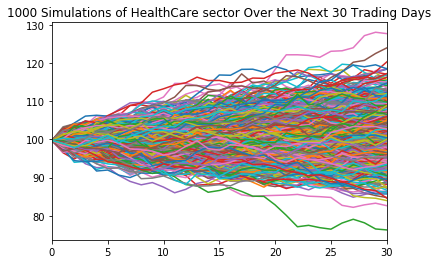

In [52]:
#Plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of HealthCare sector Over the Next 30 Trading Days"
simulated_prices_HealthCare_df.plot(legend=None, title=plot_title)

In [53]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_HealthCare = simulated_prices_HealthCare_df.iloc[-1, :]
simulated_ending_prices_HealthCare.head()

Simulation 1    101.818499
Simulation 2     96.307482
Simulation 3    105.439958
Simulation 4    108.895607
Simulation 5    101.282025
Name: 30, dtype: float64

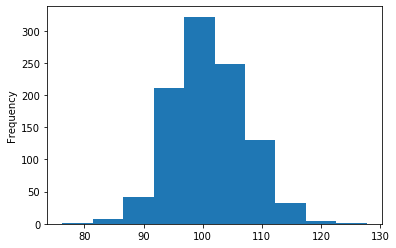

In [54]:
# Plot a frequency distribution of simulated ending prices
simulated_ending_prices_HealthCare.plot(kind='hist')

In [55]:
# Use `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices_HealthCare.quantile(q=[0.025, 0.975])
confidence_interval

0.025     90.156980
0.975    114.114299
Name: 30, dtype: float64

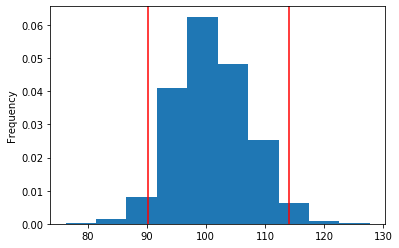

In [56]:
# Create a probability distribution histogram of simulated ending prices
# Mark the 95% confidence interval
plt.figure();
simulated_ending_prices_HealthCare.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [57]:
# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - HealthCare_last_price) / HealthCare_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - HealthCare_last_price) / HealthCare_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in the HealthCare sector"
      f" over the next 30 trading days will end within in the range of"
      f" ${round(ending_investment_lower_bound,2)} and ${round(ending_investment_upper_bound,2)}")

There is a 95% chance that an initial investment of $10,000 in the HealthCare sector over the next 30 trading days will end within in the range of $9040.11 and $11442.32


In [58]:
#Set up Monte Carlo Simulation for Industrials

#Set number of simulations

num_simulations = 1000

# Set number of trading days and get last closing price from DataFrame
num_trading_days = 30
Industrials_last_price = industrial_df[1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_Industrials_df = pd.DataFrame()

In [59]:
# Run the simulation `1000` times
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price 
    simulated_Industrials_prices = [Industrials_last_price]
    simulated_Industrials_prices

    # Simulate the returns for 30 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price_i = simulated_Industrials_prices[-1] * (1 + np.random.normal(avg_daily_return_Industrials, industrials_std))
        # Append the simulated price to the list
        simulated_Industrials_prices.append(simulated_price_i)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_Industrials_df[f"Simulation {n+1}"] = pd.Series(simulated_Industrials_prices)

simulated_prices_Industrials_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,64.210000,64.210000,64.210000,64.210000,64.210000,64.210000,64.210000,64.210000,64.210000,64.210000,...,64.210000,64.210000,64.210000,64.210000,64.210000,64.210000,64.210000,64.210000,64.210000,64.210000
1,63.738771,62.904320,66.353899,63.805564,63.676507,64.437641,64.804802,65.075795,64.374541,63.532340,...,64.614720,65.014248,64.605752,63.777503,64.214571,63.514567,65.037180,64.601446,63.477928,64.413535
2,63.933049,64.255775,65.678592,65.340439,63.605656,65.265904,64.899389,65.648347,64.891019,66.373430,...,62.516474,64.830708,64.879669,63.439603,62.616853,65.013056,65.851000,64.695699,64.491706,64.707101
3,62.911923,62.201535,65.348966,64.715394,63.626948,64.835628,65.679999,66.553992,65.356040,67.468826,...,62.437925,64.314137,66.255300,63.220534,61.055985,65.089155,65.129533,65.359784,64.228089,64.206509
4,63.198468,62.952035,65.301885,63.987165,63.407269,63.937364,64.230303,66.985109,66.454353,66.048154,...,62.246901,64.148362,67.284374,62.139179,60.396409,65.539285,64.571625,67.030369,62.138729,64.250040


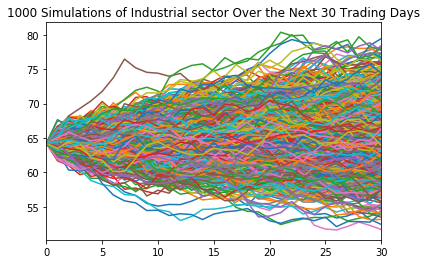

In [60]:
#Plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of Industrial sector Over the Next 30 Trading Days"
simulated_prices_Industrials_df.plot(legend=None, title=plot_title)

In [61]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_Industrials = simulated_prices_Industrials_df.iloc[-1, :]
simulated_ending_prices_Industrials.head()

Simulation 1    65.367504
Simulation 2    57.986452
Simulation 3    64.342602
Simulation 4    63.020697
Simulation 5    67.373735
Name: 30, dtype: float64

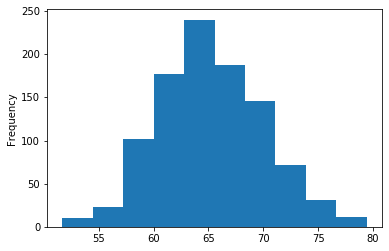

In [62]:
# Plot a frequency distribution of simulated ending prices
simulated_ending_prices_Industrials.plot(kind='hist')

In [63]:
# Use `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices_Industrials.quantile(q=[0.025, 0.975])
confidence_interval

0.025    56.436047
0.975    75.083976
Name: 30, dtype: float64

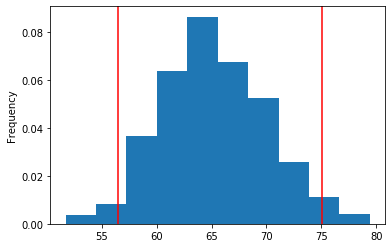

In [64]:
# Create a probability distribution histogram of simulated ending prices
# Mark the 95% confidence interval
plt.figure();
simulated_ending_prices_Industrials.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [65]:
# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - Industrials_last_price) / Industrials_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - Industrials_last_price) / Industrials_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in the Industrial sector"
      f" over the next 30 trading days will end within in the range of"
      f" ${round(ending_investment_lower_bound,2)} and ${round(ending_investment_upper_bound,2)}")

There is a 95% chance that an initial investment of $10,000 in the Industrial sector over the next 30 trading days will end within in the range of $8789.29 and $11693.5


In [66]:
#Set up Monte Carlo Simulation for Utilities

#Set number of simulations

num_simulations = 1000

# Set number of trading days and get last closing price from DataFrame
num_trading_days = 30
Utilities_last_price = utilities_df[1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_Utilities_df = pd.DataFrame()

In [67]:
# Run the simulation `1000` times
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price
    simulated_Utilities_prices = [Utilities_last_price]
    simulated_Utilities_prices

    # Simulate the returns for 30 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price_u = simulated_Utilities_prices[-1] * (1 + np.random.normal(avg_daily_return_Utilities, utilities_std))
        # Append the simulated price to the list
        simulated_Utilities_prices.append(simulated_price_u)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_Utilities_df[f"Simulation {n+1}"] = pd.Series(simulated_Utilities_prices)

simulated_prices_Utilities_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,57.260000,57.260000,57.260000,57.260000,57.260000,57.260000,57.260000,57.260000,57.260000,57.260000,...,57.260000,57.260000,57.260000,57.260000,57.260000,57.260000,57.260000,57.260000,57.260000,57.260000
1,57.081682,57.079440,56.960566,57.111336,56.569057,56.519955,56.451076,57.503723,57.599571,57.393385,...,58.036904,56.886602,56.683412,57.627825,57.796284,58.137295,56.932331,56.839906,57.109847,58.218300
2,56.752421,57.672406,56.387508,56.984584,56.310601,57.267273,56.482064,57.831258,57.747753,57.490933,...,58.387399,57.882163,57.288107,58.577413,57.725556,58.475410,56.338102,56.533457,57.071226,57.844312
3,57.656411,58.293174,55.688977,57.559113,55.258258,57.390703,56.917207,57.905844,57.219294,57.883004,...,58.151978,58.482017,57.562763,59.221187,57.237121,58.441561,56.046413,57.046553,57.963833,58.248428
4,57.814801,59.090539,56.125917,57.692241,55.220934,56.705182,56.973163,57.384664,57.634496,57.357578,...,57.709187,58.354345,58.709109,60.794211,57.200054,56.594516,56.632512,56.481785,57.588590,59.172924


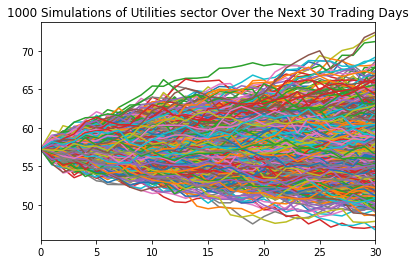

In [68]:
#Plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of Utilities sector Over the Next 30 Trading Days"
simulated_prices_Utilities_df.plot(legend=None, title=plot_title)

In [69]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_Utilities = simulated_prices_Utilities_df.iloc[-1, :]
simulated_ending_prices_Utilities.head()

Simulation 1    62.537346
Simulation 2    63.525877
Simulation 3    53.520818
Simulation 4    63.831267
Simulation 5    52.331628
Name: 30, dtype: float64

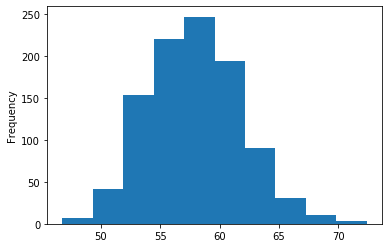

In [70]:
# Plot a frequency distribution of simulated ending prices
simulated_ending_prices_Utilities.plot(kind='hist')

In [71]:
# Use `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices_Utilities.quantile(q=[0.025, 0.975])
confidence_interval

0.025    50.472662
0.975    65.926224
Name: 30, dtype: float64

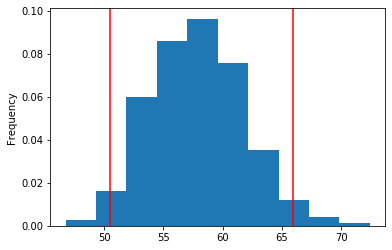

In [72]:
# Create a probability distribution histogram of simulated ending prices
# Mark the 95% confidence interval
plt.figure();
simulated_ending_prices_Utilities.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [73]:
# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - Utilities_last_price) / Utilities_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - Utilities_last_price) / Utilities_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in the Utilities sector"
      f" over the next 30 trading days will end within in the range of"
      f" ${round(ending_investment_lower_bound,2)} and ${round(ending_investment_upper_bound,2)}")

There is a 95% chance that an initial investment of $10,000 in the Utilities sector over the next 30 trading days will end within in the range of $8814.65 and $11513.49


In [74]:
#Set up Monte Carlo Simulation for Materials

#Set number of simulations

num_simulations = 1000

# Set number of trading days and get last closing price from DataFrame

num_trading_days = 30
Materials_last_price = materials_df[1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_Materials_df = pd.DataFrame()

In [75]:
# Run the simulation `1000` times
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price 
    simulated_Materials_prices = [Materials_last_price]
    simulated_Materials_prices

    # Simulate the returns for 30 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price_m = simulated_Materials_prices[-1] * (1 + np.random.normal(avg_daily_return_Materials, materials_std))
        # Append the simulated price to the list
        simulated_Materials_prices.append(simulated_price_m)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_Materials_df[f"Simulation {n+1}"] = pd.Series(simulated_Materials_prices)

simulated_prices_Materials_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,51.880000,51.880000,51.880000,51.880000,51.880000,51.880000,51.880000,51.880000,51.880000,51.880000,...,51.880000,51.880000,51.880000,51.880000,51.880000,51.880000,51.880000,51.880000,51.880000,51.880000
1,52.708189,52.890297,51.942175,51.333495,51.450983,50.530115,52.301246,52.546123,52.104707,53.054713,...,51.178351,51.732608,52.194248,53.221156,51.768983,51.697790,51.666666,51.338815,51.886472,49.958136
2,51.700448,51.526772,51.953804,51.261747,52.038594,50.132110,52.361656,51.752233,51.420350,52.678238,...,51.394018,52.768020,52.073044,55.255765,52.552993,51.481687,50.855726,50.276762,51.458769,49.061000
3,52.432583,52.095384,53.332589,51.088293,50.583499,51.061789,53.622998,52.349317,51.485085,52.636199,...,50.663492,53.627338,50.363038,55.237005,52.437182,52.534094,50.979764,50.760908,51.459389,48.889207
4,52.326582,52.697799,53.831552,51.803184,51.461932,52.841814,53.128155,52.289458,52.175689,51.901285,...,50.916463,51.808240,50.999211,56.202712,52.837843,52.902836,48.779589,51.798040,52.141936,48.338623


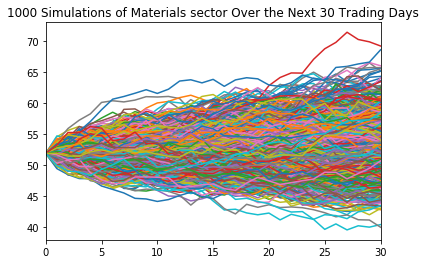

In [76]:
#Plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of Materials sector Over the Next 30 Trading Days"
simulated_prices_Materials_df.plot(legend=None, title=plot_title)

In [77]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_Materials = simulated_prices_Materials_df.iloc[-1, :]
simulated_ending_prices_Materials.head()

Simulation 1    52.135744
Simulation 2    46.812644
Simulation 3    52.151377
Simulation 4    55.546499
Simulation 5    58.865675
Name: 30, dtype: float64

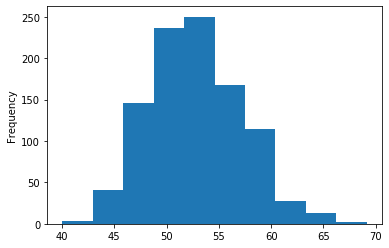

In [78]:
# Plot a frequency distribution of simulated ending prices
simulated_ending_prices_Materials.plot(kind='hist')

In [79]:
# Use `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices_Materials.quantile(q=[0.025, 0.975])
confidence_interval

0.025    44.888618
0.975    61.993584
Name: 30, dtype: float64

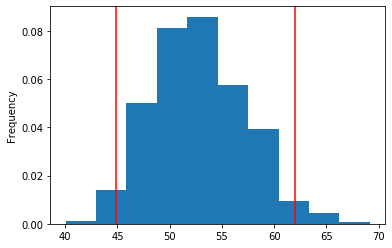

In [80]:
# Create a probability distribution histogram of simulated ending prices
# Mark the 95% confidence interval
plt.figure();
simulated_ending_prices_Materials.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [81]:
# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - Materials_last_price) / Materials_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - Materials_last_price) / Materials_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in the Materials sector"
      f" over the next 30 trading days will end within in the range of"
      f" ${round(ending_investment_lower_bound,2)} and ${round(ending_investment_upper_bound,2)}")

There is a 95% chance that an initial investment of $10,000 in the Materials sector over the next 30 trading days will end within in the range of $8652.39 and $11949.42


In [82]:
#Set up Monte Carlo Simulation for Technology

#Set number of simulations

num_simulations = 1000

# Set number of trading days and get last closing price from DataFrame

num_trading_days = 30
Tech_last_price = technology_df[1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_Tech_df = pd.DataFrame()

In [83]:
# Run the simulation `1000` times
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price 
    simulated_Tech_prices = [Tech_last_price]
    simulated_Tech_prices

    # Simulate the returns for 30 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price_t = simulated_Tech_prices[-1] * (1 + np.random.normal(avg_daily_return_Tech, tech_std))
        # Append the simulated price to the list
        simulated_Tech_prices.append(simulated_price_t)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_Tech_df[f"Simulation {n+1}"] = pd.Series(simulated_Tech_prices)

simulated_prices_Tech_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,91.410000,91.410000,91.410000,91.410000,91.410000,91.410000,91.410000,91.410000,91.410000,91.410000,...,91.410000,91.410000,91.410000,91.410000,91.410000,91.410000,91.410000,91.410000,91.410000,91.410000
1,92.727926,93.162694,90.341907,91.873411,92.315677,90.411829,92.033642,90.781613,91.296955,90.981453,...,91.214975,91.905553,93.016094,92.233772,92.378181,90.987850,93.324562,92.057139,89.519337,92.472463
2,93.652874,92.553821,90.203136,91.671670,92.937068,90.134824,92.804326,90.598098,90.223698,89.688245,...,90.974158,92.217339,92.527121,92.688093,92.010533,89.435936,93.755176,92.497895,91.398121,93.774003
3,93.268684,92.936422,90.477639,90.252685,92.016527,91.055728,92.894658,92.558764,89.645222,87.295920,...,89.300859,92.485391,94.580356,94.809594,94.049051,89.117554,95.495646,92.536033,90.389726,93.296064
4,93.402670,93.166492,91.756279,89.868381,92.082672,91.597898,91.130505,94.298252,89.799321,88.160196,...,85.787114,91.206095,93.486022,95.712908,92.262507,87.067098,96.931560,93.703212,91.347456,92.530238


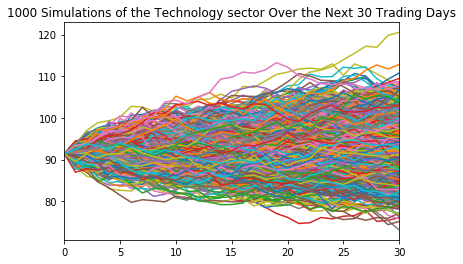

In [84]:
#Plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of the Technology sector Over the Next 30 Trading Days"
simulated_prices_Tech_df.plot(legend=None, title=plot_title)

In [85]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_Tech = simulated_prices_Tech_df.iloc[-1, :]
simulated_ending_prices_Tech.head()

Simulation 1    94.119031
Simulation 2    86.125561
Simulation 3    92.372658
Simulation 4    90.973350
Simulation 5    91.554416
Name: 30, dtype: float64

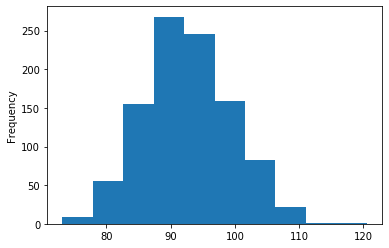

In [86]:
# Plot a frequency distribution of simulated ending prices
simulated_ending_prices_Tech.plot(kind='hist')

In [87]:
# Use `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices_Tech.quantile(q=[0.025, 0.975])
confidence_interval

0.025     80.297402
0.975    106.298147
Name: 30, dtype: float64

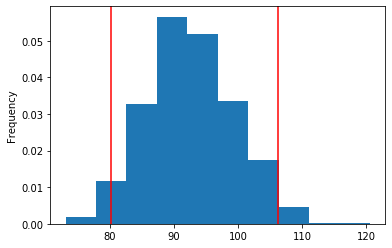

In [88]:
# Create a probability distribution histogram of simulated ending prices
# Mark the 95% confidence interval
plt.figure();
simulated_ending_prices_Tech.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [89]:
# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - Tech_last_price) / Tech_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - Tech_last_price) / Tech_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in the Technology sector"
      f" over the next 30 trading days will end within in the range of"
      f" ${round(ending_investment_lower_bound,2)} and ${round(ending_investment_upper_bound,2)}")

There is a 95% chance that an initial investment of $10,000 in the Technology sector over the next 30 trading days will end within in the range of $8784.31 and $11628.72


In [90]:
#Set up Monte Carlo Simulation for Real Estate

#Set number of simulations

num_simulations = 1000

# Set number of trading days and get last closing price from DataFrame

num_trading_days = 30
RE_last_price = real_estate_df[1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_RE_df = pd.DataFrame()

In [91]:
# Run the simulation `1000` times
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price 
    simulated_RE_prices = [RE_last_price]
    simulated_RE_prices

    # Simulate the returns for 30 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price_re = simulated_RE_prices[-1] * (1 + np.random.normal(avg_daily_return_RE, real_estate_std))
        # Append the simulated price to the list
        simulated_RE_prices.append(simulated_price_re)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_RE_df[f"Simulation {n+1}"] = pd.Series(simulated_RE_prices)

simulated_prices_RE_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,77.870000,77.870000,77.870000,77.870000,77.870000,77.870000,77.870000,77.870000,77.870000,77.870000,...,77.870000,77.870000,77.870000,77.870000,77.870000,77.870000,77.870000,77.870000,77.870000,77.870000
1,77.239346,76.293601,79.149414,78.684302,77.280440,76.645745,80.441122,76.863917,78.496903,75.920156,...,78.193032,75.909894,75.560333,79.966780,79.051340,80.994692,77.595144,77.598529,78.280741,76.592388
2,79.269743,76.149224,79.380508,80.470862,75.599158,75.539876,78.656107,76.587233,79.477832,74.050236,...,79.888023,76.035704,73.873938,80.998082,78.829362,77.258141,77.931625,78.246742,80.577575,77.227867
3,77.899399,79.352540,77.358043,80.434819,76.247069,75.702779,78.638507,77.808381,79.371244,73.000308,...,78.571633,77.334389,74.497911,79.361494,79.482534,78.517684,76.772477,76.973948,83.858037,78.605459
4,79.263892,78.037991,77.836463,80.350803,76.499151,75.911528,81.419827,78.069876,79.211030,72.751360,...,80.771402,76.939196,76.543601,80.598356,78.267719,79.821488,79.911232,75.341319,83.358908,79.907419


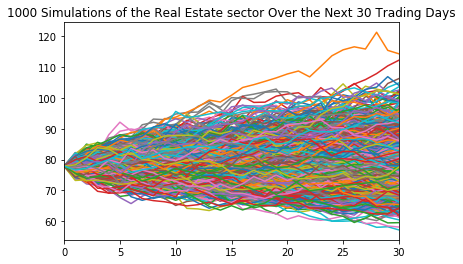

In [92]:
#Plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of the Real Estate sector Over the Next 30 Trading Days"
simulated_prices_RE_df.plot(legend=None, title=plot_title)

In [93]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_RE = simulated_prices_RE_df.iloc[-1, :]
simulated_ending_prices_RE.head()

Simulation 1    86.609130
Simulation 2    83.437950
Simulation 3    92.410273
Simulation 4    76.803752
Simulation 5    81.347551
Name: 30, dtype: float64

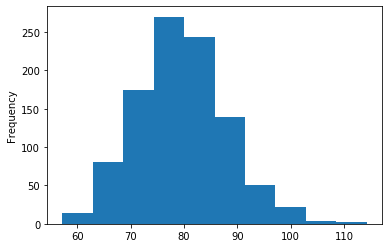

In [94]:
# Plot a frequency distribution of simulated ending prices
simulated_ending_prices_RE.plot(kind='hist')

In [95]:
# Use `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices_RE.quantile(q=[0.025, 0.975])
confidence_interval

0.025    64.209155
0.975    97.665741
Name: 30, dtype: float64

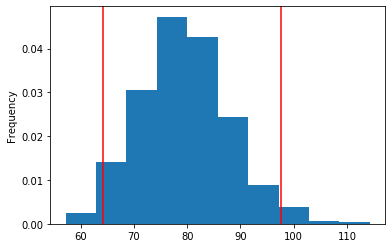

In [96]:
# Create a probability distribution histogram of simulated ending prices
# Mark the 95% confidence interval
plt.figure();
simulated_ending_prices_RE.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [97]:
# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - RE_last_price) / RE_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - RE_last_price) / RE_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in the Real Estate sector"
      f" over the next 30 trading days will end within in the range of"
      f" ${round(ending_investment_lower_bound,2)} and ${round(ending_investment_upper_bound,2)}")

There is a 95% chance that an initial investment of $10,000 in the Real Estate sector over the next 30 trading days will end within in the range of $8245.69 and $12542.15


In [98]:
#Set up Monte Carlo Simulation for Consumer Discretionary

#Set number of simulations

num_simulations = 1000

# Set number of trading days and get last closing price from DataFrame

num_trading_days = 30
Disc_last_price = cons_disc_df[1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_Disc_df = pd.DataFrame()

In [99]:
# Run the simulation `1000` times
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price 
    simulated_Disc_prices = [Disc_last_price]
    simulated_Disc_prices

    # Simulate the returns for 30 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price_disc = simulated_Disc_prices[-1] * (1 + np.random.normal(avg_daily_return_Discretionary, cons_disc_std))
        # Append the simulated price to the list
        simulated_Disc_prices.append(simulated_price_disc)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_Disc_df[f"Simulation {n+1}"] = pd.Series(simulated_Disc_prices)

simulated_prices_Disc_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,...,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000
1,114.297448,120.157310,114.804569,116.838994,116.198733,116.259565,115.049494,117.538798,114.359058,117.854916,...,117.783261,117.855622,118.167779,115.950327,114.679387,116.275679,114.067259,114.764714,117.042851,116.561168
2,114.958256,118.732185,114.602224,118.683762,114.885466,115.413783,113.191369,117.586832,113.783549,119.784066,...,117.383096,117.708490,118.172592,116.251200,113.060802,116.890072,116.119239,114.714290,117.962605,117.903610
3,115.413377,117.681187,113.422020,118.126102,117.218373,116.710761,113.666575,119.433630,114.786221,121.133426,...,116.454665,117.075319,119.561226,116.538354,111.062970,117.728627,116.119413,114.730879,115.477150,119.269786
4,117.905595,117.466486,111.733126,116.977929,113.697733,117.240219,113.532533,120.615640,115.900024,121.479704,...,116.839439,118.083369,118.348066,114.896973,110.496727,117.999086,116.904414,117.194071,116.040416,117.584456


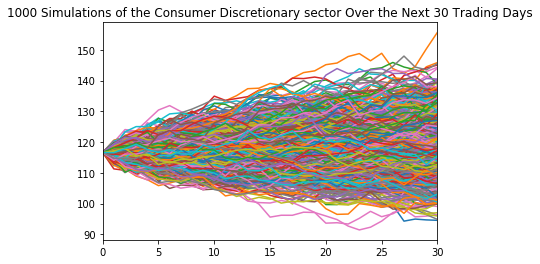

In [100]:
#Plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of the Consumer Discretionary sector Over the Next 30 Trading Days"
simulated_prices_Disc_df.plot(legend=None, title=plot_title)

In [101]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_Disc = simulated_prices_Disc_df.iloc[-1, :]
simulated_ending_prices_Disc.head()

Simulation 1    115.289976
Simulation 2    126.550592
Simulation 3     99.985921
Simulation 4    118.733565
Simulation 5    133.330523
Name: 30, dtype: float64

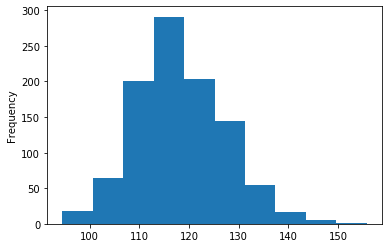

In [102]:
# Plot a frequency distribution of simulated ending prices
simulated_ending_prices_Disc.plot(kind='hist')

In [103]:
# Use `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices_Disc.quantile(q=[0.025, 0.975])
confidence_interval

0.025    101.885086
0.975    136.514816
Name: 30, dtype: float64

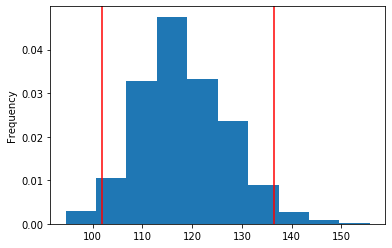

In [104]:
# Create a probability distribution histogram of simulated ending prices
# Mark the 95% confidence interval
plt.figure();
simulated_ending_prices_Disc.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [105]:
# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - Disc_last_price) / Disc_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - Disc_last_price) / Disc_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in the Consumer Discretionary sector"
      f" over the next 30 trading days will end within in the range of"
      f" ${round(ending_investment_lower_bound,2)} and ${round(ending_investment_upper_bound,2)}")

There is a 95% chance that an initial investment of $10,000 in the Consumer Discretionary sector over the next 30 trading days will end within in the range of $8738.0 and $11707.96


In [106]:
#Set up Monte Carlo Simulation for Consumer Staples

#Set number of simulations

num_simulations = 1000

# Set number of trading days and get last closing price from DataFrame

num_trading_days = 30
Staples_last_price = cons_staples_df[1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_Staples_df = pd.DataFrame()

In [107]:
# Run the simulation `1000` times
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price 
    simulated_Staples_prices = [Staples_last_price]
    simulated_Staples_prices

    # Simulate the returns for 30 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price_staples = simulated_Staples_prices[-1] * (1 + np.random.normal(avg_daily_return_Staples, staples_std))
        # Append the simulated price to the list
        simulated_Staples_prices.append(simulated_price_staples)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_Staples_df[f"Simulation {n+1}"] = pd.Series(simulated_Staples_prices)

simulated_prices_Staples_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,...,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000
1,58.519556,57.935453,58.925298,58.777743,58.290003,58.647521,58.559215,57.771855,58.847600,58.159458,...,58.153859,58.366540,58.353555,58.303764,59.154126,57.495909,58.370976,58.347113,58.142479,58.005936
2,59.259651,57.884449,58.831332,58.358067,58.608690,58.053601,58.643923,58.359304,58.798324,57.698692,...,57.650293,58.879981,58.147418,57.103357,59.550232,57.040897,57.760394,57.866830,58.449401,56.841821
3,59.595496,58.255973,59.061826,58.825675,58.938526,57.394367,59.146253,58.313633,58.712934,57.980720,...,56.695323,57.740947,57.513063,57.012543,59.639409,57.343854,57.015379,58.135256,58.853332,56.962396
4,58.736226,58.329549,59.000631,57.925191,58.233021,57.354390,59.277545,58.354931,58.013203,57.418458,...,56.899055,57.301661,56.824167,56.324709,59.729920,56.680155,56.937400,58.354066,58.516421,57.276977


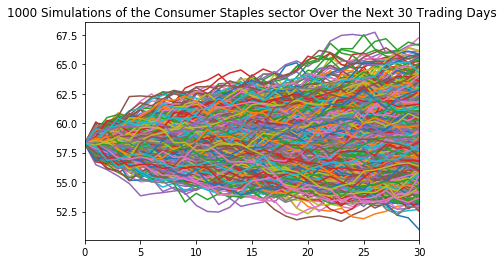

In [108]:
#Plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of the Consumer Staples sector Over the Next 30 Trading Days"
simulated_prices_Staples_df.plot(legend=None, title=plot_title)

In [109]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_Staples = simulated_prices_Staples_df.iloc[-1, :]
simulated_ending_prices_Staples.head()

Simulation 1    63.348120
Simulation 2    55.517742
Simulation 3    54.293763
Simulation 4    57.931205
Simulation 5    56.710740
Name: 30, dtype: float64

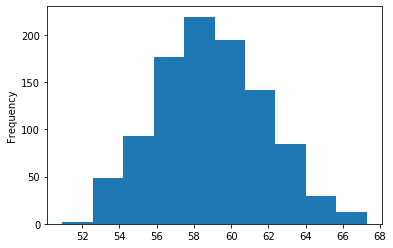

In [110]:
# Plot a frequency distribution of simulated ending prices
simulated_ending_prices_Staples.plot(kind='hist')

In [111]:
# Use `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices_Staples.quantile(q=[0.025, 0.975])
confidence_interval

0.025    53.660266
0.975    64.739621
Name: 30, dtype: float64

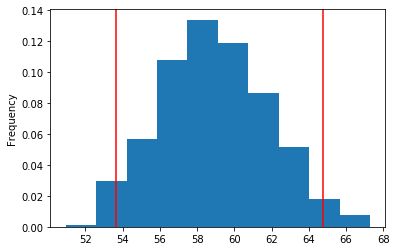

In [112]:
# Create a probability distribution histogram of simulated ending prices
# Mark the 95% confidence interval
plt.figure();
simulated_ending_prices_Staples.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [113]:
# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - Staples_last_price) / Staples_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - Staples_last_price) / Staples_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in the Consumer Staples sector"
      f" over the next 30 trading days will end within in the range of"
      f" ${round(ending_investment_lower_bound,2)} and ${round(ending_investment_upper_bound,2)}")

There is a 95% chance that an initial investment of $10,000 in the Consumer Staples sector over the next 30 trading days will end within in the range of $9210.48 and $11112.19


In [114]:
#Set up Monte Carlo Simulation for Energy

#Set number of simulations

num_simulations = 1000

# Set number of trading days and get last closing price from DataFrame

num_trading_days = 30
Energy_last_price = energy_df[1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_Energy_df = pd.DataFrame()

In [115]:
# Run the simulation `1000` times
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price 
    simulated_Energy_prices = [Energy_last_price]
    simulated_Energy_prices

    # Simulate the returns for 30 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price_energy = simulated_Energy_prices[-1] * (1 + np.random.normal(avg_daily_return_Energy, energy_std))
        # Append the simulated price to the list
        simulated_Energy_prices.append(simulated_price_energy)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_Energy_df[f"Simulation {n+1}"] = pd.Series(simulated_Energy_prices)

simulated_prices_Energy_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
1,38.068165,38.733756,36.742838,37.483906,38.069074,38.512460,38.315076,36.747770,37.335454,38.672536,...,37.990335,38.143190,37.334053,37.491518,36.611641,39.139874,40.169137,37.981107,38.537414,38.704519
2,37.730098,38.313789,37.730265,36.459039,38.026700,37.083345,38.949775,35.865705,37.589273,41.040225,...,38.120342,39.110800,38.113277,37.218540,36.569232,38.987924,39.636624,38.458810,37.646330,40.672095
3,38.393169,38.056955,37.253661,36.032696,39.157519,36.104130,38.932057,36.344346,37.150886,41.728765,...,38.545555,39.530279,38.535610,37.748704,35.703116,39.377906,38.999925,37.277446,37.785341,38.917361
4,38.445875,37.806216,36.090910,36.355858,39.887947,35.929606,39.644651,36.323353,37.930923,41.489044,...,39.578434,38.450131,38.739679,38.287121,36.018648,40.613030,38.822535,37.589832,37.473540,38.463314


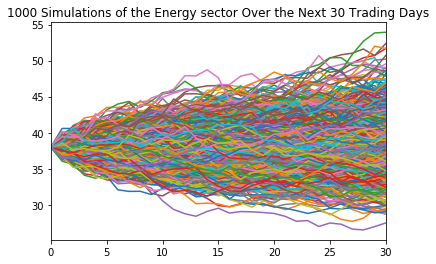

In [116]:
#Plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of the Energy sector Over the Next 30 Trading Days"
simulated_prices_Energy_df.plot(legend=None, title=plot_title)

In [117]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_Energy = simulated_prices_Energy_df.iloc[-1, :]
simulated_ending_prices_Energy.head()

Simulation 1    38.026664
Simulation 2    41.268157
Simulation 3    36.213606
Simulation 4    36.647144
Simulation 5    37.989582
Name: 30, dtype: float64

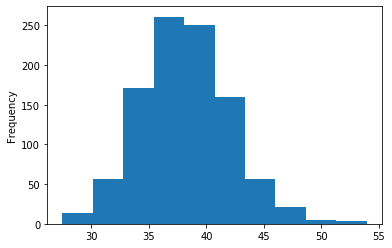

In [118]:
# Plot a frequency distribution of simulated ending prices
simulated_ending_prices_Energy.plot(kind='hist')

In [119]:
# Use `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices_Energy.quantile(q=[0.025, 0.975])
confidence_interval

0.025    31.259029
0.975    46.580918
Name: 30, dtype: float64

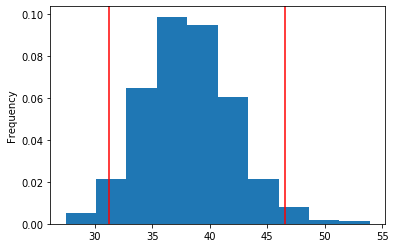

In [120]:
# Create a probability distribution histogram of simulated ending prices
# Mark the 95% confidence interval
plt.figure();
simulated_ending_prices_Energy.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [121]:
# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - Energy_last_price) / Energy_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - Energy_last_price) / Energy_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in the Energy sector"
      f" over the next 30 trading days will end within in the range of"
      f" ${round(ending_investment_lower_bound,2)} and ${round(ending_investment_upper_bound,2)}")

There is a 95% chance that an initial investment of $10,000 in the Energy sector over the next 30 trading days will end within in the range of $8226.06 and $12258.14


In [122]:
#Set up Monte Carlo Simulation for Finance

#Set number of simulations

num_simulations = 1000

# Set number of trading days and get last closing price from DataFrame

num_trading_days = 30
FIN_last_price = financials_df[1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_FIN_df = pd.DataFrame()

In [123]:
# Run the simulation `1000` times
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price 
    simulated_FIN_prices = [FIN_last_price]
    simulated_FIN_prices

    # Simulate the returns for 30 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price_fin = simulated_FIN_prices[-1] * (1 + np.random.normal(avg_daily_return_FIN, financials_std))
        # Append the simulated price to the list
        simulated_FIN_prices.append(simulated_price_fin)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_FIN_df[f"Simulation {n+1}"] = pd.Series(simulated_FIN_prices)

simulated_prices_FIN_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,22.790000,22.790000,22.790000,22.790000,22.790000,22.790000,22.790000,22.790000,22.790000,22.790000,...,22.790000,22.790000,22.790000,22.790000,22.790000,22.790000,22.790000,22.790000,22.790000,22.790000
1,23.162286,23.149856,22.282350,22.249898,22.892850,22.451238,23.492929,22.338117,22.354691,21.759964,...,22.421108,22.826354,23.428973,23.736309,23.460471,23.100551,22.472498,23.067064,23.715028,22.903249
2,23.887376,23.490486,22.693054,22.265588,23.299638,22.032497,23.699091,22.486137,22.874952,22.919512,...,22.478240,22.999777,22.301681,23.983572,23.852003,22.833674,22.457605,23.036659,23.677867,23.391350
3,23.749954,23.727471,22.876292,22.636144,23.708224,22.496387,23.324345,23.195774,22.738039,22.815377,...,22.150183,22.740362,22.351305,24.026853,24.263364,22.843151,22.017412,23.509793,23.904782,23.185488
4,23.232855,24.514551,22.854397,22.372737,23.633093,22.729175,23.185487,23.332629,22.374910,22.577932,...,22.647254,23.014036,22.097877,24.491371,23.821670,23.424719,21.625217,23.333587,24.258880,23.367429


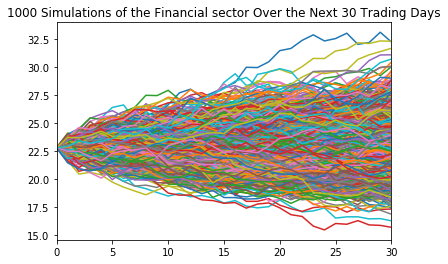

In [124]:
#Plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of the Financial sector Over the Next 30 Trading Days"
simulated_prices_FIN_df.plot(legend=None, title=plot_title)

In [125]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_FIN = simulated_prices_FIN_df.iloc[-1, :]
simulated_ending_prices_FIN.head()

Simulation 1    24.272032
Simulation 2    27.652187
Simulation 3    22.317520
Simulation 4    26.341060
Simulation 5    23.050170
Name: 30, dtype: float64

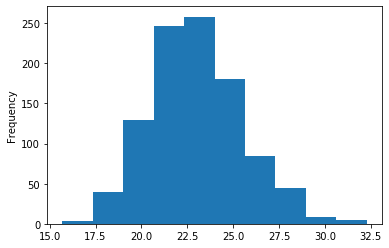

In [126]:
# Plot a frequency distribution of simulated ending prices
simulated_ending_prices_FIN.plot(kind='hist')

In [127]:
# Use `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices_FIN.quantile(q=[0.025, 0.975])
confidence_interval

0.025    18.665753
0.975    28.220175
Name: 30, dtype: float64

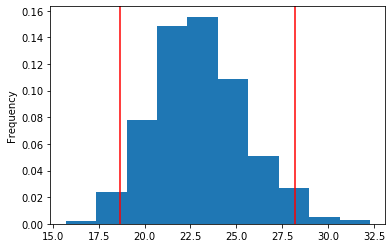

In [128]:
# Create a probability distribution histogram of simulated ending prices
# Mark the 95% confidence interval
plt.figure();
simulated_ending_prices_FIN.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [129]:
# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - FIN_last_price) / FIN_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - FIN_last_price) / FIN_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in the Financial sector"
      f" over the next 30 trading days will end within in the range of"
      f" ${round(ending_investment_lower_bound,2)} and ${round(ending_investment_upper_bound,2)}")

There is a 95% chance that an initial investment of $10,000 in the Financial sector over the next 30 trading days will end within in the range of $8190.33 and $12382.7


In [130]:
#Set up Monte Carlo Simulation for Transports

#Set number of simulations

num_simulations = 1000

# Set number of trading days and get last closing price from DataFrame

num_trading_days = 30
Tran_last_price = transports_df[1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_Tran_df = pd.DataFrame()

In [131]:
# Run the simulation `1000` times
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price 
    simulated_Tran_prices = [Tran_last_price]
    simulated_Tran_prices

    # Simulate the returns for 30 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price_tran = simulated_Tran_prices[-1] * (1 + np.random.normal(avg_daily_return_Transports, transports_std))
        # Append the simulated price to the list
        simulated_Tran_prices.append(simulated_price_tran)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_Tran_df[f"Simulation {n+1}"] = pd.Series(simulated_Tran_prices)

simulated_prices_Tran_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,149.920000,149.920000,149.920000,149.920000,149.920000,149.920000,149.920000,149.920000,149.920000,149.920000,...,149.920000,149.920000,149.920000,149.920000,149.920000,149.920000,149.920000,149.920000,149.920000,149.920000
1,149.658063,150.509642,150.765244,153.274228,151.246880,149.211208,149.753250,151.554412,152.197625,149.745149,...,153.039110,152.358499,147.200393,148.180486,148.059417,146.098274,150.478521,153.851845,148.032839,147.979935
2,146.843650,153.126306,151.425479,153.871309,156.675009,144.460257,148.479514,150.590029,154.520197,148.787810,...,155.799007,154.423049,151.268117,151.419509,145.264851,145.079410,152.583681,151.568784,142.743968,146.505632
3,145.757742,148.948886,146.778157,152.901900,156.672446,144.983649,144.930627,149.970288,152.093073,152.243424,...,155.489322,155.758717,151.094923,150.540661,142.874721,145.755812,153.184437,153.751771,139.615250,147.667634
4,145.503610,148.447725,145.335396,149.465662,153.007017,147.676659,142.477874,150.335538,152.930625,153.231980,...,155.087426,160.111358,151.678025,149.852229,143.161806,146.795374,151.590288,151.230473,141.572135,147.473843


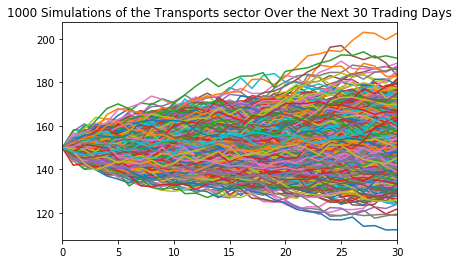

In [132]:
#Plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of the Transports sector Over the Next 30 Trading Days"
simulated_prices_Tran_df.plot(legend=None, title=plot_title)

In [133]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_Tran = simulated_prices_Tran_df.iloc[-1, :]
simulated_ending_prices_Tran.head()

Simulation 1    136.858096
Simulation 2    139.860472
Simulation 3    153.920756
Simulation 4    135.851452
Simulation 5    169.125164
Name: 30, dtype: float64

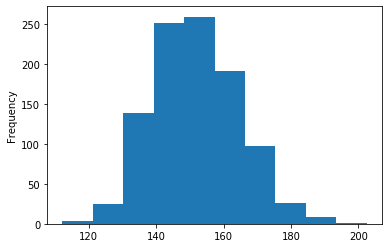

In [134]:
# Plot a frequency distribution of simulated ending prices
simulated_ending_prices_Tran.plot(kind='hist')

In [135]:
# Use `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices_Tran.quantile(q=[0.025, 0.975])
confidence_interval

0.025    129.984807
0.975    177.261194
Name: 30, dtype: float64

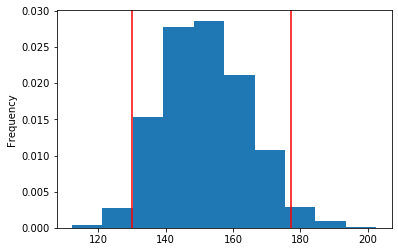

In [136]:
# Create a probability distribution histogram of simulated ending prices
# Mark the 95% confidence interval
plt.figure();
simulated_ending_prices_Tran.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [137]:
# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - Tran_last_price) / Tran_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - Tran_last_price) / Tran_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in the Transports sector"
      f" over the next 30 trading days will end within in the range of"
      f" ${round(ending_investment_lower_bound,2)} and ${round(ending_investment_upper_bound,2)}")

There is a 95% chance that an initial investment of $10,000 in the Transports sector over the next 30 trading days will end within in the range of $8670.28 and $11823.72
